In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import re
import string

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(23196, 5)

In [4]:
df.dropna(inplace=True)

In [5]:
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.lower()  # Lowercase
    return text

In [6]:
# Apply the cleaning function
df['title'] = df['title'].apply(clean_text)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['real'], test_size=0.2, random_state=42)

In [8]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [11]:
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train_tfidf, y_train)

y_pred = svm.predict(X_test_tfidf)



In [13]:
# Predict and evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8469610843900306
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.46      0.59      1105
           1       0.85      0.97      0.91      3469

    accuracy                           0.85      4574
   macro avg       0.84      0.72      0.75      4574
weighted avg       0.84      0.85      0.83      4574



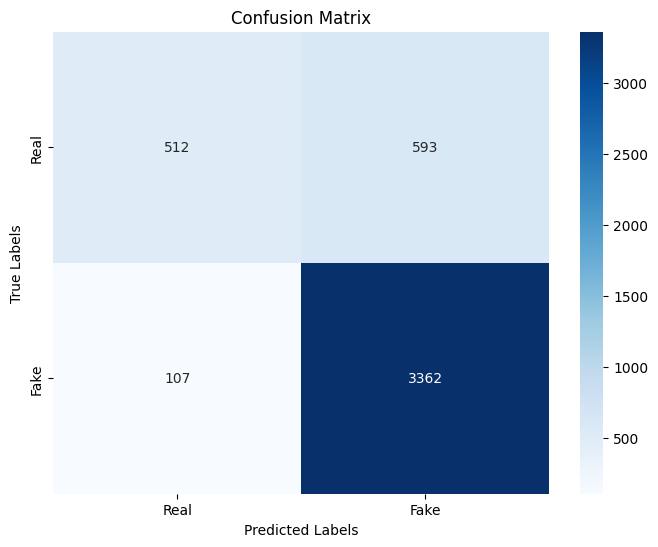

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()